# MODEL GENERATION

Data for the identification of the eccDNA was obtained from WGS sequenicng data. Machine learning approaches will be applied to identify the eccDNA. Since the ground truth contains binary values, logistic regression is considered for classification.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [1]:
# Calling the data

data_mod = pd.read_csv('C:/Users/ASHA/BIGDATA/DATA/eccDNA_DATA.csv')

NameError: name 'pd' is not defined

In [4]:
print(data_mod.shape)
print(data_mod.columns)

(9861, 13)
Index(['sample_id', 'chr', 'start_coord', 'end_coord', 'discordants',
       'split_reads', 'circle_score', 'mean_cov', 'stddev_cov',
       'cov_incr_start', 'cov_incr_end', 'con_continuity', 'target'],
      dtype='object')


In [5]:
data_mod.head(5)

,sample_id,chr,start_coord,end_coord,discordants,split_reads,circle_score,mean_cov,stddev_cov,cov_incr_start,cov_incr_end,con_continuity,target
0,SRR10704195,chr10,26935713,26940339,4,0,0.00,0.511457,0.724456,0.980000,0.839286,0.609166,0
1,SRR10704195,chr10,39506876,39506941,4,0,0.00,2.553846,0.723895,0.882979,0.882979,0.000000,0
2,SRR10704195,chr10,41860269,41860323,13,0,0.00,448.240741,177.763569,0.709262,0.968316,0.000000,0
3,SRR10704195,chr10,113689917,113689999,4,0,0.00,0.902439,0.296720,0.986667,0.986667,0.097561,0
4,SRR10704195,chr12,68786262,69204786,84,17,195.97,22.579384,11.965008,0.984020,0.998708,0.010456,1


In [6]:
data_mod.isnull().sum()

sample_id          0
chr                0
start_coord        0
end_coord          0
discordants        0
split_reads        0
circle_score       0
mean_cov           0
stddev_cov         0
cov_incr_start    35
cov_incr_end      29
con_continuity     0
target             0
dtype: int64

In [7]:
data_null = data_mod[data_mod.isnull().any(axis=1)]

In [8]:
(data_null['target'] == 1).sum()

0

It is confirmed that rows with target labels 1 had no null values. Since, already the dataset contains imbalanced labels, I intend to drop the rows with null values

In [9]:
# Dropping rows containing null values in 'cov_incr_start' and 'cov_incr_end' columns
data_mod2 = data_mod.dropna(axis=0, subset=['cov_incr_start', 'cov_incr_end'])
print(data_mod2.head())
print(data_mod2.shape)

     sample_id    chr  start_coord  end_coord  discordants  split_reads  \
0  SRR10704195  chr10     26935713   26940339            4            0   
1  SRR10704195  chr10     39506876   39506941            4            0   
2  SRR10704195  chr10     41860269   41860323           13            0   
3  SRR10704195  chr10    113689917  113689999            4            0   
4  SRR10704195  chr12     68786262   69204786           84           17   

   circle_score    mean_cov  stddev_cov  cov_incr_start  cov_incr_end  \
0          0.00    0.511457    0.724456        0.980000      0.839286   
1          0.00    2.553846    0.723895        0.882979      0.882979   
2          0.00  448.240741  177.763569        0.709262      0.968316   
3          0.00    0.902439    0.296720        0.986667      0.986667   
4        195.97   22.579384   11.965008        0.984020      0.998708   

   con_continuity  target  
0        0.609166       0  
1        0.000000       0  
2        0.000000       0 

In [10]:
# shuffle the DataFrame rows 
data_mod2 = data_mod2.sample(frac = 1).reset_index(drop=True)

In [11]:
print(data_mod2.shape)
print(data_mod2.columns)

(9797, 13)
Index(['sample_id', 'chr', 'start_coord', 'end_coord', 'discordants',
       'split_reads', 'circle_score', 'mean_cov', 'stddev_cov',
       'cov_incr_start', 'cov_incr_end', 'con_continuity', 'target'],
      dtype='object')


In [12]:
print(data_mod2.head(5))

     sample_id               chr  start_coord  end_coord  discordants  \
0  SRR10704198              chr9    127506131  127506165            0   
1   SRR4009202             chr10     41860262   41860326           18   
2   SRR4009229  chrUn_KI270337v1          736        915           20   
3   SRR4009304             chr10     41891839   41910184            4   
4   SRR4009288              chr6    150167944  150167987            0   

   split_reads  circle_score     mean_cov  stddev_cov  cov_incr_start  \
0            1           9.0     2.500000    0.696631        0.485714   
1            0           0.0  1270.968750  491.867327        0.733458   
2            0           0.0   302.201117  137.586636        0.912972   
3            0           0.0    26.884710   39.638268        0.301816   
4            1          40.0     9.279070    1.226179        0.643548   

   cov_incr_end  con_continuity  target  
0      0.629630        0.000000       0  
1      0.980709        0.000000       

In [13]:
#Adding a new column by finding the length of the coordinates based on start_coord and end_coord

data_mod3 = pd.DataFrame()
data_mod3 = data_mod2.drop(['sample_id', 'chr', 'start_coord', 'end_coord', 'target'], axis = 1)
data_mod3["len_coords"] = data_mod2['end_coord'] - data_mod2['start_coord'] 

In [489]:
data_mod3.head()

,discordants,split_reads,circle_score,mean_cov,stddev_cov,cov_incr_start,cov_incr_end,con_continuity,len_coords
0,4,0,0.0,21.557377,9.641992,0.393595,0.842949,0.000000,61
1,3,0,0.0,222.225807,135.446623,0.921051,0.964373,0.000000,62
2,3,0,0.0,3.557377,1.361347,0.649701,0.794872,0.000000,61
3,9,0,0.0,3.026701,14.423754,0.802161,0.300000,0.177331,7713316
4,3,0,0.0,154.551724,81.927254,0.912645,0.943182,0.068966,58


In [14]:
# Checking the distribution in imbalanced dataset

data_mod2['target'].value_counts()/data_mod2.shape[0]

0    0.99459
1    0.00541
Name: target, dtype: float64

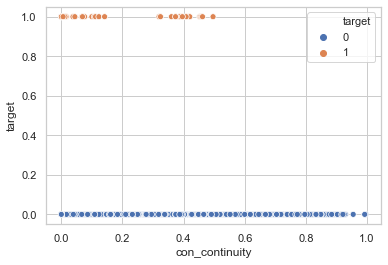

In [15]:
# Plotting the distribution in different color to each class.


plot = sns.scatterplot(data=data_mod2,x='con_continuity',y='target',hue='target')




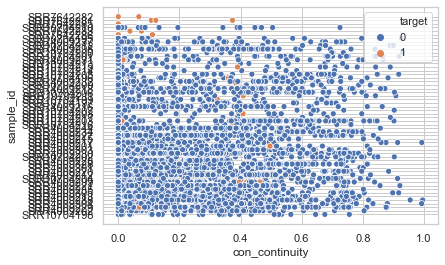

In [16]:

sns.scatterplot(data=data_mod2,x='con_continuity',y='sample_id',hue='target')

**Weighted Logistic Regression for Imbalanced datasets** 

Using class-weights in accordance with the class distribution. Class-weights is the extent to which the algorithm is punished for any wrong prediction of that class.

With default weights, classifier will assume that both kinds of label error i.e. false positive (FP) and false negative (FN) have the same cost. Or in other words, classifier assumes that wrong prediction of either of the labels has same cost. But in fact, wrong prediction of minority class is more worse than wrong prediction of majority class.

# Logistic regression (Default)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

In [18]:
X = data_mod3
y = data_mod2.loc[:, data_mod.columns == 'target']

In [19]:
# summarize class distribution
# Total records with label 0

(y['target']==0).sum()

9744

In [20]:
# Total records with label 1

(y['target']==1).sum()

53

In [21]:
print(X.head(5))
print(y.head(5))

   discordants  split_reads  circle_score     mean_cov  stddev_cov  \
0            0            1           9.0     2.500000    0.696631   
1           18            0           0.0  1270.968750  491.867327   
2           20            0           0.0   302.201117  137.586636   
3            4            0           0.0    26.884710   39.638268   
4            0            1          40.0     9.279070    1.226179   

   cov_incr_start  cov_incr_end  con_continuity  len_coords  
0        0.485714      0.629630        0.000000          34  
1        0.733458      0.980709        0.000000          64  
2        0.912972      0.929801        0.000000         179  
3        0.301816      0.382641        0.002398       18345  
4        0.643548      0.740260        0.000000          43  
   target
0       0
1       0
2       0
3       0
4       0


Then the dataset is transformed using the SMOTE and the new class distribution is summarized, showing a balanced distribution now with 9,900 examples in the minority class.

In [22]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[1]
    pyplot.scatter(X['con_continuity'], X['len_coords'], label=str(label))
#    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

NameError: name 'counter' is not defined

In [ ]:
# transform the dataset
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

In [ ]:
X_smote

In [ ]:
# After SMOTE
(y_smote['target']==0).sum()

In [23]:
# After SMOTE
(y_smote['target']==1).sum()

NameError: name 'y_smote' is not defined

In [24]:
Xsb_train, Xsb_test, ysb_train, ysb_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=0)
columns = Xsb_train.columns

NameError: name 'X_smote' is not defined

In [513]:
print(Xsb_train.shape)
print(Xsb_test.shape)
print(ysb_train.shape)
print(ysb_test.shape)

(13641, 9)
(5847, 9)
(13641, 1)
(5847, 1)


In [514]:
# train-test split after standard scaling of the X data matrix

from sklearn.preprocessing import StandardScaler

Xss_train = StandardScaler().fit_transform(Xsb_train)
print(Xss_train)

[[-0.29027442 -0.03338161 -0.01714414 ...  0.0622056  -0.57218963
  -0.29806252]
 [ 0.2099909   0.17382156  0.10134656 ...  0.58815508 -0.4419533
  -0.26720437]
 [ 0.27669295 -0.09258252 -0.06851245 ... -1.36990039  0.0537791
   3.83696405]
 ...
 [ 2.1777012   0.14422111  0.01877289 ...  0.90666809 -0.64238128
  -0.27620341]
 [ 1.07711747  0.05541975 -0.02687034 ...  0.91290686  1.25738196
  -0.19372733]
 [-0.45702953 -0.07778229 -0.0499136  ...  0.79369073 -0.69500589
  -0.29806847]]


In [520]:
# define model
model_eccdna_lr = LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_eccdna_lr, Xss_train, ysb_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
mean_scores = scores.mean()
print('Mean ROC AUC: %.3f' % mean_scores)

Mean ROC AUC: 0.927


In [521]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

model_eccdna_lr.fit(Xss_train,ysb_train)
predictions = model_eccdna_lr.predict(Xsb_test)
print(classification_report(ysb_test,predictions))
print(confusion_matrix(ysb_test,predictions))
print(f'F-measure: %.3f' % f1_score(ysb_test,predictions))

C:\Users\ASHA\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.70      0.74      0.72      2910
           1       0.73      0.69      0.71      2937

    accuracy                           0.71      5847
   macro avg       0.71      0.71      0.71      5847
weighted avg       0.71      0.71      0.71      5847

[[2158  752]
 [ 922 2015]]
F-measure: 0.707


**MODEL with logistic Regression, standardized and smote with no weights will be used**

# Saving the model using pickle

In [517]:
import pickle

In [519]:
# save the model to disk
eccdna_log = 'finalized_model.sav'
pickle.dump(model_eccdna_lr, open(eccdna_log, 'wb'))


In [ ]:
# later...
 
# load the model from disk
loaded_model = pickle.load(open(eccdna_log, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)